# Matplotlib Examples

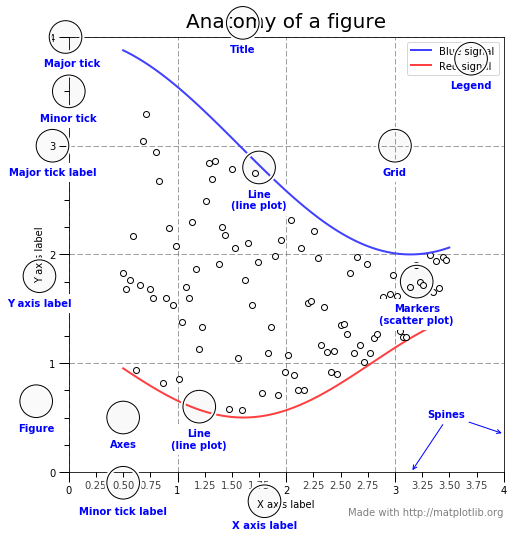

In [7]:
# This figure shows the name of several matplotlib elements composing a figure
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

In [8]:
"""
Plot demonstrating the integral as the area under a curve.

Although this is a simple example, it demonstrates some important tweaks:

    * A simple line plot with custom color and line width.
    * A shaded region created using a Polygon patch.
    * A text label with mathtext rendering.
    * figtext calls to label the x- and y-axes.
    * Use of axis spines to hide the top and right spines.
    * Custom tick placement and labels.
"""
%matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

Using matplotlib backend: MacOSX


In [3]:
"""
===================================
Shaded & power normalized rendering
===================================

The Mandelbrot set rendering can be improved by using a normalized recount
associated with a power normalized colormap (gamma=0.3). Rendering can be
further enhanced thanks to shading.

The `maxiter` gives the precision of the computation. `maxiter=200` should
take a few seconds on most modern laptops.
"""
%matplotlib

import numpy as np


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)
    C = X + Y[:, None]*1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000/2
    ymin, ymax, yn = -1.25, +1.25, 2500/2
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 -
                          np.log(np.log(abs(Z)))/np.log(2) +
                          log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    year = time.strftime("%Y")
    major, minor, micro = matplotlib.__version__.split('.', 2)
    text = ("The Mandelbrot fractal set\n"
            "Rendered with matplotlib %s.%s, %s - http://matplotlib.org"
            % (major, minor, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()

Using matplotlib backend: MacOSX


In [9]:
%matplotlib

import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.05,
        '"The Data So Far" from xkcd by Randall Monroe',
        ha='center')

plt.show()

Using matplotlib backend: MacOSX


In [10]:
%matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

Using matplotlib backend: MacOSX


In [11]:
%matplotlib

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 2*np.pi, 10)
markerline, stemlines, baseline = plt.stem(x, np.cos(x), '-.')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)

plt.show()

Using matplotlib backend: MacOSX


In [12]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""
%matplotlib

import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# Four polar axes
f, axarr = plt.subplots(2, 2, subplot_kw=dict(projection='polar'))
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.3)

plt.show()

Using matplotlib backend: MacOSX


In [13]:
'''
Demonstrates using ax.plot's zdir keyword to plot 2D scatterplot data on
selective axes of a 3D plot.
'''
%matplotlib

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')
x = np.random.sample(20*len(colors))
y = np.random.sample(20*len(colors))
c_list = []
for c in colors:
    c_list.append([c]*20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x,z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()

Using matplotlib backend: MacOSX


In [15]:
"""
Demonstrates using custom hillshading in a 3D surface plot.
"""
%matplotlib

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

filename = cbook.get_sample_data('jacksboro_fault_dem.npz', asfileobj=False)
with np.load(filename) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

Using matplotlib backend: MacOSX


In [16]:
"""
.. versionadded:: 1.1.0
   This demo depends on new features added to contourf3d.
"""
%matplotlib

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

Using matplotlib backend: MacOSX


In [17]:
# Plot of the Lorenz Attractor based on Edward Lorenz's 1963 "Deterministic
# Nonperiodic Flow" publication.
# http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2
#
# Note: Because this is a simple non-linear ODE, it would be more easily
#       done using SciPy's ode solver, but this approach depends only
#       upon NumPy.

%matplotlib

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
stepCnt = 10000

# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

Using matplotlib backend: MacOSX


In [18]:
'''
===================================
3D wireframe plots in one direction
===================================

Demonstrates that setting rstride or cstride to 0 causes wires to not be
generated in the corresponding direction.
'''
%matplotlib

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(8, 12), subplot_kw={'projection': '3d'})

# Get the test data
X, Y, Z = axes3d.get_test_data(0.05)

# Give the first plot only wireframes of the type y = c
ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=0)
ax1.set_title("Column (x) stride set to 0")

# Give the second plot only wireframes of the type x = c
ax2.plot_wireframe(X, Y, Z, rstride=0, cstride=10)
ax2.set_title("Row (y) stride set to 0")

plt.tight_layout()
plt.show()

Using matplotlib backend: MacOSX


0

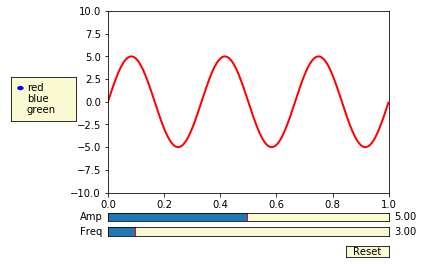

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

%matplotlib inline

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

#% matplt.show()

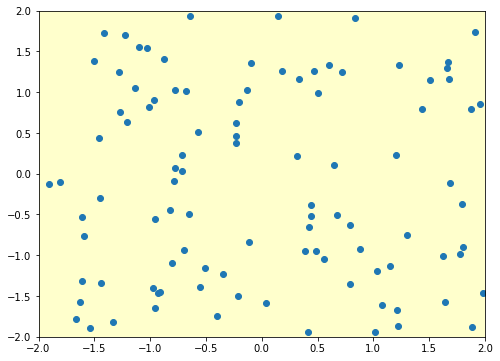

In [24]:
%matplotlib inline

from matplotlib.widgets import Cursor
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, facecolor='#FFFFCC')

x, y = 4*(np.random.rand(2, 100) - .5)
ax.plot(x, y, 'o')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# set useblit = True on gtkagg for enhanced performance
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

plt.show()

In [21]:
"""Displays a set of subplots with an MRI image, its intensity histogram and
some EEG traces.
"""
%matplotlib

from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.cm as cm

from matplotlib.collections import LineCollection
from matplotlib.ticker import MultipleLocator

fig = plt.figure("MRI_with_EEG")

# Load the MRI data (256x256 16 bit integers)
dfile = cbook.get_sample_data('s1045.ima.gz')
im = np.fromstring(dfile.read(), np.uint16).astype(float)
im.shape = (256, 256)
dfile.close()

# Plot the MRI image
ax0 = fig.add_subplot(2, 2, 1)
ax0.imshow(im, cmap=cm.gray)
ax0.axis('off')

# Plot the histogram of MRI intensity
ax1 = fig.add_subplot(2, 2, 2)
im = np.ravel(im)
im = im[np.nonzero(im)]  # Ignore the background
im = im / (2**16 - 1)  # Normalize
ax1.hist(im, bins=100)
ax1.xaxis.set_major_locator(MultipleLocator(0.4))
ax1.minorticks_on()
ax1.set_yticks([])
ax1.set_xlabel('Intensity (a.u.)')
ax1.set_ylabel('MRI density')

# Load the EEG data
numSamples, numRows = 800, 4
eegfile = cbook.get_sample_data('eeg.dat', asfileobj=False)
print('Loading EEG %s' % eegfile)
data = np.fromfile(eegfile, dtype=float)
data.shape = (numSamples, numRows)
t = 10.0 * np.arange(numSamples) / numSamples

# Plot the EEG
ticklocs = []
ax2 = fig.add_subplot(2, 1, 2)
ax2.set_xlim(0, 10)
ax2.set_xticks(np.arange(10))
dmin = data.min()
dmax = data.max()
dr = (dmax - dmin) * 0.7  # Crowd them a bit.
y0 = dmin
y1 = (numRows - 1) * dr + dmax
ax2.set_ylim(y0, y1)

segs = []
for i in range(numRows):
    segs.append(np.hstack((t[:, np.newaxis], data[:, i, np.newaxis])))
    ticklocs.append(i * dr)

offsets = np.zeros((numRows, 2), dtype=float)
offsets[:, 1] = ticklocs

lines = LineCollection(segs, offsets=offsets, transOffset=None)
ax2.add_collection(lines)

# Set the yticks to use axes coordinates on the y axis
ax2.set_yticks(ticklocs)
ax2.set_yticklabels(['PG3', 'PG5', 'PG7', 'PG9'])

ax2.set_xlabel('Time (s)')


plt.tight_layout()
plt.show()

Using matplotlib backend: MacOSX
Loading EEG /Users/jimmy/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/sample_data/eeg.dat


In [22]:
"""
Demo of the `streamplot` function.

A streamplot, or streamline plot, is used to display 2D vector fields. This
example shows a few features of the stream plot function:

    * Varying the color along a streamline.
    * Varying the density of streamlines.
    * Varying the line width along a stream line.
"""

%matplotlib

import numpy as np
import matplotlib.pyplot as plt

Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn)
fig0.colorbar(strm.lines)

fig1, (ax1, ax2) = plt.subplots(ncols=2)
ax1.streamplot(X, Y, U, V, density=[0.5, 1])

lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)

plt.show()

Using matplotlib backend: MacOSX


In [27]:
"""
=====
Decay
=====

This example showcases a sinusoidal decay animation.
"""

%matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()

Using matplotlib backend: MacOSX


In [32]:
"""
=========================
Simple animation examples
=========================

This example contains two animations. The first is a random walk plot. The
second is an image animation.
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib

def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()

Using matplotlib backend: MacOSX


In [31]:
"""
==================
Animated histogram
==================

This example shows how to use a path patch to draw a bunch of
rectangles for an animated histogram.

"""
import numpy as np
%matplotlib

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation
fig, ax = plt.subplots()

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)
plt.show()

Using matplotlib backend: MacOSX


In [30]:
"""
    JE Touma, Oct'16
    Adapted from:
    
    Scott Hudson, WSU Tri-Cities
    1D electromagnetic finite-difference time-domain (FDTD) program.
    Assumes Ey and Hz field components propagating in the x direction.
    Fields, permittivity, permeability, and conductivity
    are functions of x. Try changing the value of "profile".
"""
from __future__ import division
import numpy as np
import matplotlib
#matplotlib.use('QT5Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation

L = 5.0  # domain length in meters
N = 505  # no. spatial samples in domain
Niter = 800  # no. of iterations to perform
fs = 300e6  # source frequency in Hz
ds = L / N  # spatial step in meters
dt = ds / 300e6  # "magic time step"
eps0 = 8.854e-12  # permittivity of free space
mu0 = np.pi * 4e-7  # permeability of free space
x = np.linspace(0, L, N)  # x coordinate of spatial samples

# scale factors for E and H
ae = np.ones((N, 1)) * dt / (ds * eps0)
am = np.ones((N, 1)) * dt / (ds * mu0)
_as = np.ones((N, 1))
epsr = np.ones((N, 1))
mur = np.ones((N, 1))
sigma = np.zeros((N, 1))

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Here we specify the epsilon, sigma, and mu profiles. I've
# predefined some interesting examples. Try profile = 1,2,3,4,5,6 in sequence.
# You can define epsr(i), mur(i) (relative permittivity and permeability)
# %and sigma(i) (conductivity) to be anything you want.
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

profile = 1
for i in range(N):
    epsr[i] = 1
    mur[i] = 1
    w1 = 0.5
    w2 = 1.5

    if profile == 1:  # %dielectric window
        if abs(x[i] - L / 2) < 0.5:
            epsr[i] = 4
    elif profile == 2:  # %dielectric window with smooth transition
        if abs(x[i] - L / 2) < 1.5:
            epsr[i] = 1 + 3 * (1 + np.cos(np.pi * (abs(x[i] - L / 2) - w1) / (w2 - w1))) / 2
        if abs(x[i] - L / 2) < 0.5:
            epsr[i] = 4
    elif profile == 3:  # %dielectric discontinuity
        if x[i] > L / 2:
            epsr[i] = 9
    elif profile == 4:  # %dielectric discontinuity with 1/4-wave matching layer
        if x[i] > (L / 2 - 0.1443):
            epsr[i] = 3
        if x[i] > L / 2:
            epsr[i] = 9
    elif profile == 5:  # %conducting half space
        if x[i] > L / 2:
            sigma[i] = 0.005
    elif profile == 6:  # %sinusoidal dielectric
        epsr[i] = 1 + np.sin(2 * np.pi * x[i] / L) ** 2

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


ae = ae / epsr
am = am / mur
ae = ae / (1 + dt * (sigma / epsr) / (2 * eps0))
_as = (1 - dt * (sigma / epsr) / (2 * eps0)) / (1 + dt * (sigma / epsr) / (2 * eps0))

# %initialize fields to zero
Hz = np.zeros((N, 1))
Ey = np.zeros((N, 1))
fig2, ax = plt.subplots()
lines = list()
lines.append(plt.plot(x,Ey)[0])
lines.append(plt.plot(x,Hz)[0])
ax.grid(True)
ax.set_ylim(-2, 2)

def init():
    lines[0].set_data(x, Ey)
    lines[1].set_data(x, 377*Hz)
    return lines

def animate(_iter):
    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    # The next 10 or so lines of code are where we actually integrate Maxwell's
    # equations. All the rest of the program is basically bookkeeping and plotting.
    # "smooth turn on" sinusoidal source
    Ey[2] += 2 * (1 - np.exp(-(_iter / 50) ** 2)) * np.sin(2 * np.pi * fs * dt * (_iter + 1))
    Hz[0] = Hz[1]  # %absorbing boundary conditions for left-propagating waves
    for i in range(1, N - 1):  # %update H field
        Hz[i] = Hz[i] - am[i] * (Ey[i + 1] - Ey[i])

    Ey[N - 1] = Ey[N - 2]  # %absorbing boundary conditions for right propagating waves
    for i in range(1, N - 1):  # %update E field
        Ey[i] = _as[i] * Ey[i] - ae[i] * (Hz[i] - Hz[i - 1])

    lines[0].set_data(x, Ey)
    lines[1].set_data(x, 377*Hz)
    return lines


ani = animation.FuncAnimation(fig2, animate, np.arange(1, Niter), init_func=init, interval=100, blit=True)
plt.show()

In [33]:
"""
=================
Animated subplots
=================

This example uses subclassing, but there is no reason that the proper function
couldn't be set up and then use FuncAnimation. The code is long, but not
really complex. The length is due solely to the fact that there are a total of
9 lines that need to be changed for the animation as well as 3 subplots that
need initial set up.

"""
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation


class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        ax3 = fig.add_subplot(2, 2, 4)

        self.t = np.linspace(0, 80, 400)
        self.x = np.cos(2 * np.pi * self.t / 10.)
        self.y = np.sin(2 * np.pi * self.t / 10.)
        self.z = 10 * self.t

        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        self.line1 = Line2D([], [], color='black')
        self.line1a = Line2D([], [], color='red', linewidth=2)
        self.line1e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax1.add_line(self.line1)
        ax1.add_line(self.line1a)
        ax1.add_line(self.line1e)
        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-2, 2)
        ax1.set_aspect('equal', 'datalim')

        ax2.set_xlabel('y')
        ax2.set_ylabel('z')
        self.line2 = Line2D([], [], color='black')
        self.line2a = Line2D([], [], color='red', linewidth=2)
        self.line2e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax2.add_line(self.line2)
        ax2.add_line(self.line2a)
        ax2.add_line(self.line2e)
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(0, 800)

        ax3.set_xlabel('x')
        ax3.set_ylabel('z')
        self.line3 = Line2D([], [], color='black')
        self.line3a = Line2D([], [], color='red', linewidth=2)
        self.line3e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax3.add_line(self.line3)
        ax3.add_line(self.line3a)
        ax3.add_line(self.line3e)
        ax3.set_xlim(-1, 1)
        ax3.set_ylim(0, 800)

        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)

    def _draw_frame(self, framedata):
        i = framedata
        head = i - 1
        head_slice = (self.t > self.t[i] - 1.0) & (self.t < self.t[i])

        self.line1.set_data(self.x[:i], self.y[:i])
        self.line1a.set_data(self.x[head_slice], self.y[head_slice])
        self.line1e.set_data(self.x[head], self.y[head])

        self.line2.set_data(self.y[:i], self.z[:i])
        self.line2a.set_data(self.y[head_slice], self.z[head_slice])
        self.line2e.set_data(self.y[head], self.z[head])

        self.line3.set_data(self.x[:i], self.z[:i])
        self.line3a.set_data(self.x[head_slice], self.z[head_slice])
        self.line3e.set_data(self.x[head], self.z[head])

        self._drawn_artists = [self.line1, self.line1a, self.line1e,
                               self.line2, self.line2a, self.line2e,
                               self.line3, self.line3a, self.line3e]

    def new_frame_seq(self):
        return iter(range(self.t.size))

    def _init_draw(self):
        lines = [self.line1, self.line1a, self.line1e,
                 self.line2, self.line2a, self.line2e,
                 self.line3, self.line3a, self.line3e]
        for l in lines:
            l.set_data([], [])

ani = SubplotAnimation()
# ani.save('test_sub.mp4')
plt.show()

Using matplotlib backend: MacOSX


In [ ]:
"""
============
3D animation
============

A simple example of an animated plot... In 3D!
"""
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

In [34]:
"""
===========================
The double pendulum problem
===========================

This animation illustrates the double pendulum problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c


%matplotlib
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

# ani.save('double_pendulum.mp4', fps=15)
plt.show()

Using matplotlib backend: MacOSX
